In [30]:
from TSP_Formulation_Methods import *
import numpy as np
import glob

distances_original_matrix = np.loadtxt("./data/matriz-rutas-granada")


# Global parameters

N = 5 # Number of stops
p = 2 # Number of travels, aka number of edges. The number of involucred stops is then p+1

startNodes = [0,1]
endNodes = [2,3]
L = len(startNodes)

# process parameters

p = min(p, N-1)
startNodes = [min(N-1, s) for s in startNodes]
endNodes = [min(N-1, s) for s in endNodes]


distances_N_stops_normalized = distances_original_matrix[:N,:N]/np.max(distances_original_matrix[:N,:N])

In [31]:
def load_lambda_means(concrete_simulations):
    """
    Carga los pesos lambda desde archivos, calcula su media y devuelve la lista de medias.
    """
    files_to_find = f"./data/lamdasOptimized/{concrete_simulations}*"
    files = glob.glob(files_to_find)

    all_weights = [np.loadtxt(file) for file in files]

    if not all_weights:
        return []  # Retorna lista vacía si no hay datos

    all_weights = np.array(all_weights)  # Shape: (num_files, 5)

    return np.mean(all_weights, axis=0).tolist() 

In [13]:
num_reads = 1000
all_lambdas = [load_lambda_means("lambdas_N_5_p_2"), load_lambda_means("lambdas_N_3_p_2")] 

solutions_multiple_lines = generate_solutions_for_multiple_lines(distances_N_stops_normalized, p, startNodes, endNodes, L, all_lambdas, num_reads)

check_multiline_validity(solutions_multiple_lines, N, p, startNodes, endNodes, L)

Solution 0 is not valid.
Solution 1 is not valid.
All solutions are valid.


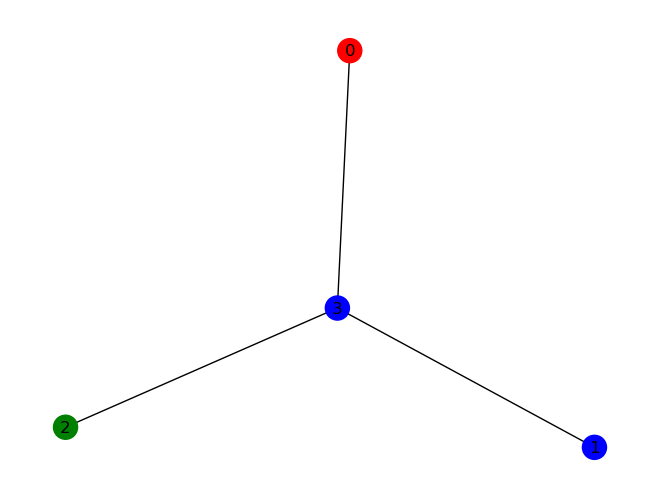

In [14]:
draw_solution_graph(solutions_multiple_lines[0], distances_N_stops_normalized, p, startNodes[0], endNodes[0])

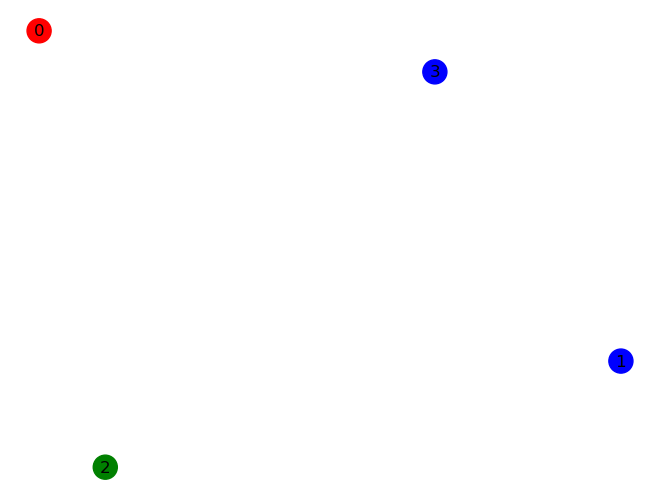

In [15]:
draw_solution_graph(solutions_multiple_lines[1], distances_N_stops_normalized, p, startNodes[1], endNodes[1])

In [32]:
# Try to solve in an uniformed way

all_lambdas = [load_lambda_means("lambdas_N_{}_p_{}".format(N,p)) for _ in range(L)]  # Load the same lambdas for all lines
num_reads = 10000


solutions_multiple_lines_uninformed = generate_solutions_for_multiple_lines_uninformed(distances_N_stops_normalized, p, startNodes, endNodes, L, all_lambdas, num_reads)

check_multiline_validity(solutions_multiple_lines_uninformed, N, p, startNodes, endNodes, L)

solution_cost = distance_cost_of_multilines(solutions_multiple_lines_uninformed, distances_N_stops_normalized, p, bidirectional=True)

print("Cost of the solution: ", solution_cost)

Solution 1 is not valid.
All solutions are valid.
Cost of the solution:  3.0744176281408953


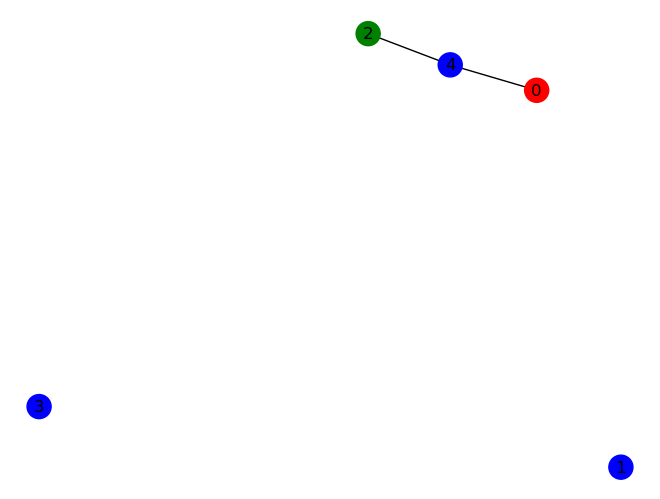

In [33]:
draw_solution_graph(solutions_multiple_lines_uninformed[0], distances_N_stops_normalized, p, startNodes[0], endNodes[0])

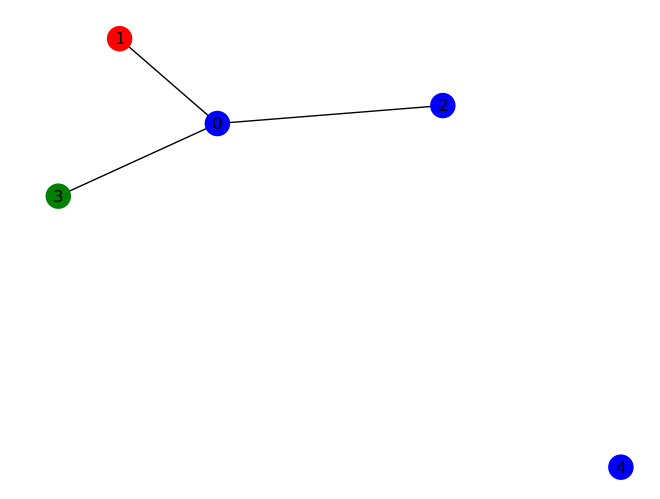

In [34]:
draw_solution_graph(solutions_multiple_lines_uninformed[1], distances_N_stops_normalized, p, startNodes[1], endNodes[1])

In [40]:
# Try to solve in an uniformed way trying different start and end nodes and minimizing the total distance

all_start_end_combinations = generate_all_start_end_combinations(N, L)

In [41]:
best_solution = None
best_solution_cost = 1000 # Silly high value
best_solution_startNodes = None
best_solution_endNodes = None
print("Longitude of all_start_end_combinations: ", len(all_start_end_combinations))
num_reads = 4000
for startNodes, endNodes in all_start_end_combinations:
    solutions_multiple_lines_uninformed = generate_solutions_for_multiple_lines_uninformed(distances_N_stops_normalized, p, startNodes, endNodes, L, all_lambdas, num_reads)
    if check_multiline_validity(solutions_multiple_lines_uninformed, N, p, startNodes, endNodes, L, returnFormat=True):
        total_distance = distance_cost_of_multilines(solutions_multiple_lines_uninformed, distances_N_stops_normalized, p, bidirectional=True)
        if best_solution_cost > total_distance:
            best_solution = solutions_multiple_lines_uninformed
            best_solution_cost = total_distance
            best_solution_startNodes = startNodes
            best_solution_endNodes = endNodes


print("Best solution cost: ", best_solution_cost)
print("Best solution startNodes: ", best_solution_startNodes)
print("Best solution endNodes: ", best_solution_endNodes)

Longitude of all_start_end_combinations:  60
Best solution cost:  1000
Best solution startNodes:  None
Best solution endNodes:  None
